In [2]:
from Chemometrics.import_common import *
%matplotlib inline 
plt.rcParams['font.sans-serif'] = 'SimHei'

In [3]:
data = pload('公安大学纤维颜色.p')
X = data['厂家纤维光谱'].T
y = data['colors']

(array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
        2000.]), <a list of 10 Text xticklabel objects>)

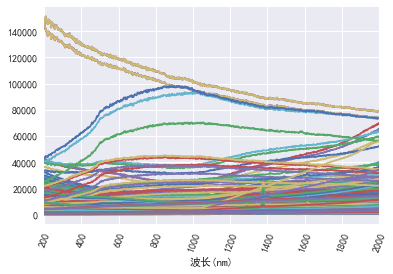

In [4]:
X.T.plot(legend=False)
plt.xticks(rotation=70)

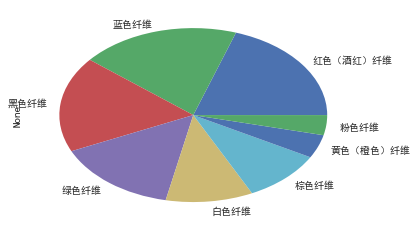

In [5]:
pd.Series(y).value_counts().plot.pie()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

# pipeline workflow

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif,mutual_info_classif,chi2,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
steps = [('preprocessing',None),
         ('fselect',SelectKBest(f_classif,k=10)),
         ('clf',RandomForestClassifier(class_weight='balanced',random_state=1))]
pipe = Pipeline(steps)
param_grid = dict(preprocessing=[None,StandardScaler(),MinMaxScaler()],
                  fselect__score_func = [f_classif,mutual_info_classif],
                 clf__min_samples_leaf = range(3,6))
#knn
steps_knn = [('preprocessing',None),
             ('fselect',SelectKBest(f_classif,k=10)),
         ('clf',KNeighborsClassifier())]
pipe_knn = Pipeline(steps_knn)
param_grid_knn = dict(preprocessing=[None,StandardScaler(),MinMaxScaler()],
                 fselect__score_func = [f_classif,mutual_info_classif],
                 clf__n_neighbors = range(3,6))

## 参数优化

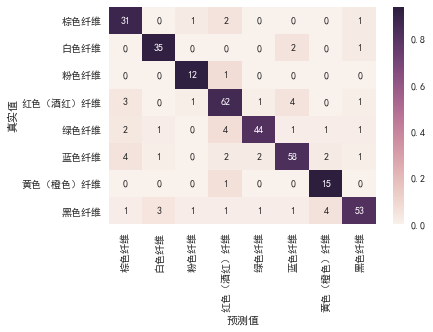

In [8]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid = GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
plot_cm(X_train,y_train,grid)

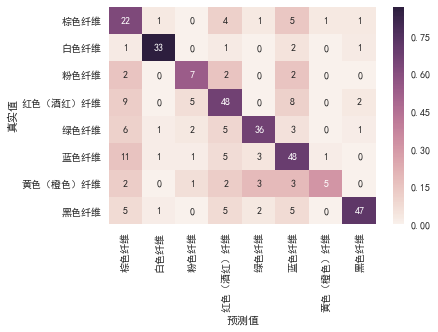

In [9]:
grid = GridSearchCV(pipe_knn,param_grid=param_grid_knn,n_jobs=-1)
grid.fit(X_train,y_train)
plot_cm(X_train,y_train,grid)

In [10]:
cross_val_score(grid,X_train,y_train,n_jobs =-1)

array([0.38709677, 0.36363636, 0.46610169])